In [1]:

from crypto_chatter.data import CryptoChatterData
from crypto_chatter.graph import CryptoChatterGraphBuilder
from crypto_chatter.config import CryptoChatterDataConfig, CryptoChatterGraphConfig
from crypto_chatter.utils import progress_bar

dataset = "twitter:blockchain-interoperability-attacks"
data_config = CryptoChatterDataConfig(dataset)
data = CryptoChatterData(
    data_config,
)

data.load([data.data_config.clean_text_col])

reply_graph_config = CryptoChatterGraphConfig(
    data_config=data_config,
    graph_kind="tweet-reply",
)
quote_graph_config = CryptoChatterGraphConfig(
    data_config=data_config,
    graph_kind="tweet-quote",
)

reply_builder = CryptoChatterGraphBuilder(
    data=data,
    graph_config=reply_graph_config,
)

quote_builder = CryptoChatterGraphBuilder(
    data=data,
    graph_config=quote_graph_config,
)

reply_graph = reply_builder.get_graph()
quote_graph = quote_builder.get_graph()

we are using cuda 🏎🏎🏎
loading ['full_text', 'id']..
refreshed with ['full_text', 'id'] in 7.60 seconds
loading ['clean_text']..
loaded ['clean_text'] in 6.28 seconds
loading ['id', 'in_reply_to_status_id']..
loaded ['in_reply_to_status_id'] in 4.27 seconds
loaded graph edges in 41.43 seconds
loading ['id', 'quoted_status.id']..
loaded ['quoted_status.id'] in 1.08 seconds
loaded graph edges in 36.45 seconds


In [2]:
len(data)

16713595

In [3]:
# data.available_columns
data.load(['created_at'])


loading ['created_at']..
loaded ['created_at'] in 4.53 seconds


In [6]:
import pandas as pd
data.df['created_at'] = pd.to_datetime(
    data.df['created_at'],
      format="%a %b %d %H:%M:%S +0000 %Y"
)

# data.df['created_at']

In [21]:
# data.df['created_at'].min(), data.df['created_at'].max()

# ().sum()

# , len(data)

valid_time = data.df[data.df['created_at'] >= pd.Timestamp('2022-11-09')]

In [11]:
quote_wccs = quote_builder.get_subgraphs(
    graph=quote_graph,
    kind="component",
    component="weak",
    top_n=10,
)

In [25]:
sg =quote_wccs[0] 
subset = valid_time[valid_time.id.astype(int).isin(sg.nodes)]


# data.df[data.df.id.isin(quote_wccs[0].nodes)].shape, len(quote_wccs[0].nodes)

188

In [42]:
qd = quote_graph.degree(kind="all")

In [59]:
quote_graph.degree(kind="out").std()

1.9976544693646674

In [43]:
from collections import Counter

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
sentiments = data.get('sentiment', sg.nodes)

In [41]:
sentiments[0]

Sentiment(negative=0.696931004524231, neutral=0.29203635454177856, positive=0.011032582260668278)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes = plt.subplots(nrows=len(quote_wccs), )
start,end = valid_time['created_at'].min(), valid_time['created_at'].max()
time_range = pd.date_range(start=start, end=end, freq='30min')

size_over_time = [
    (subset['created_at'] < ts).sum()
    for ts in time_range
]


In [39]:
time_range

DatetimeIndex(['2022-11-09 00:00:00', '2022-11-09 00:30:00',
               '2022-11-09 01:00:00', '2022-11-09 01:30:00',
               '2022-11-09 02:00:00', '2022-11-09 02:30:00',
               '2022-11-09 03:00:00', '2022-11-09 03:30:00',
               '2022-11-09 04:00:00', '2022-11-09 04:30:00',
               ...
               '2022-11-23 16:00:00', '2022-11-23 16:30:00',
               '2022-11-23 17:00:00', '2022-11-23 17:30:00',
               '2022-11-23 18:00:00', '2022-11-23 18:30:00',
               '2022-11-23 19:00:00', '2022-11-23 19:30:00',
               '2022-11-23 20:00:00', '2022-11-23 20:30:00'],
              dtype='datetime64[ns]', length=714, freq='30T')

AttributeError: Axes.set() got an unexpected keyword argument 'xticklables'

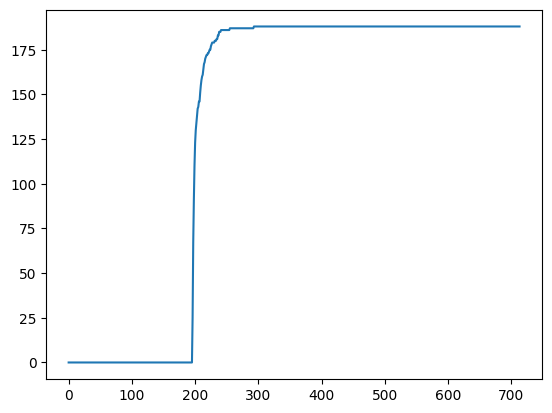

In [38]:
sns.lineplot(
    x = list(range(len(time_range))),
    y = size_over_time,
).set(
    xticklables = ['hi' ]*len(time_range)
)

In [14]:
valid_time.loc[quote_wccs[0].nodes,:]

KeyError: "None of [Index([1591609103197286400, 1591610704565604352, 1591627743535714304,\n       1591611009743163392, 1591638860752392192, 1591614254536613888,\n       1591635548153974784, 1591614032146055168, 1591623787405266944,\n       1591618121458421760,\n       ...\n       1591759813276565504, 1591642777489735680, 1591616024369303552,\n       1591897061796052992, 1591752012957450240, 1591734809877155840,\n       1591710078985551872, 1591676610721333248, 1591671519142461440,\n       1591614073598361600],\n      dtype='int64', length=188)] are in the [index]"